In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data set
nobel = pd.read_csv('nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
# What is the most commonly awarded gender and birth country?
top_gender = nobel.value_counts('sex').index[0]
print(top_gender)

top_country = nobel.value_counts('birth_country').index[0]
print(top_country)

Male
United States of America


Text(0, 0.5, 'Count')

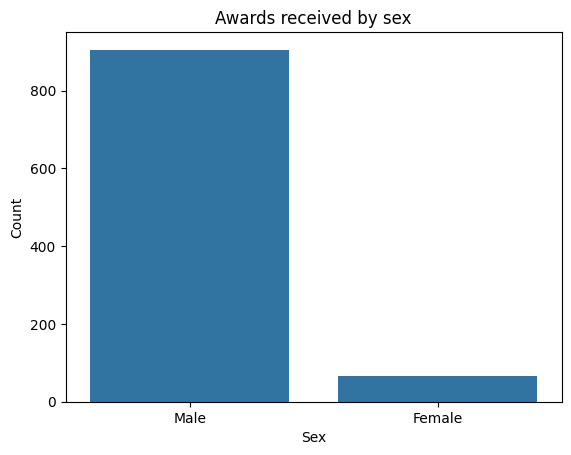

In [4]:
# visualising the most commonly awareded gender
g = sns.countplot(x='sex', data=nobel)
g.set_title('Awards received by sex')
plt.xlabel('Sex')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

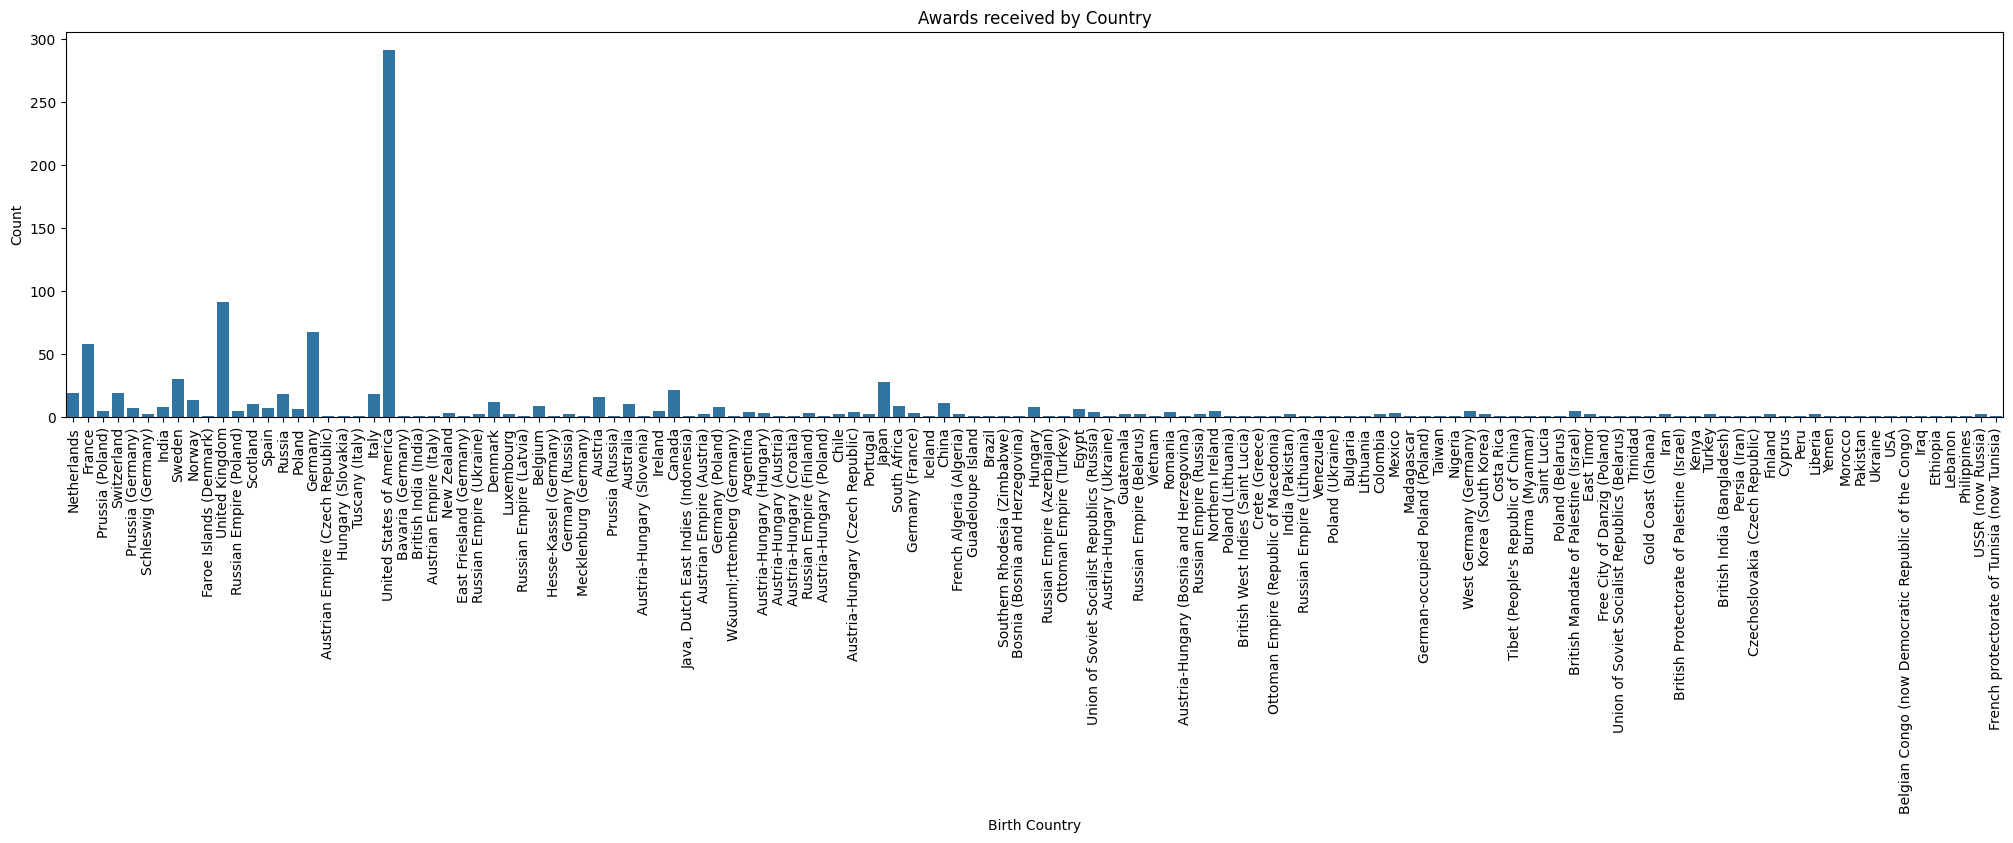

In [5]:
# visualising the most commonly awareded gender
plt.figure(figsize=(25,5))
g = sns.countplot(x='birth_country', data=nobel)
plt.xticks(rotation=90)
g.set_title('Awards received by Country')
plt.xlabel('Birth Country')
plt.ylabel('Count')

In [6]:
# What decade had the highest proportion of US-born winners?
nobel['decade'] = nobel.year // 10 * 10
max_decade_usa = nobel[nobel.birth_country == 'United States of America'].value_counts('decade').index[0]
print(max_decade_usa)

2000


Text(0, 0.5, 'Number of winners')

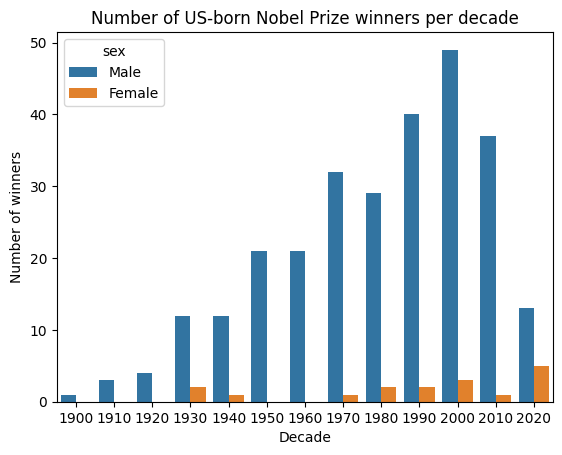

In [7]:
# Plotting number of US-born winners per decade
us_winners = nobel[nobel.birth_country == 'United States of America']
g = sns.countplot(x='decade', data=us_winners, hue='sex')
g.set_title('Number of US-born Nobel Prize winners per decade')
plt.xlabel('Decade')
plt.ylabel('Number of winners')

In [8]:
# What decade and category pair had the highest proportion of female laureates?
max_female_decade_category = nobel.groupby(['decade', 'category'], as_index=False).sex.value_counts(normalize=True)[lambda x: x.sex == 'Female'].sort_values(['proportion', 'category'], ascending=[False, True]).head(1)[['decade', 'category']]
max_female_dict = {max_female_decade_category.decade.values[0]:max_female_decade_category.category.values[0]}
print(max_female_dict)

{2020: 'Literature'}


Text(1081.8873125000002, 0.5, 'Count')

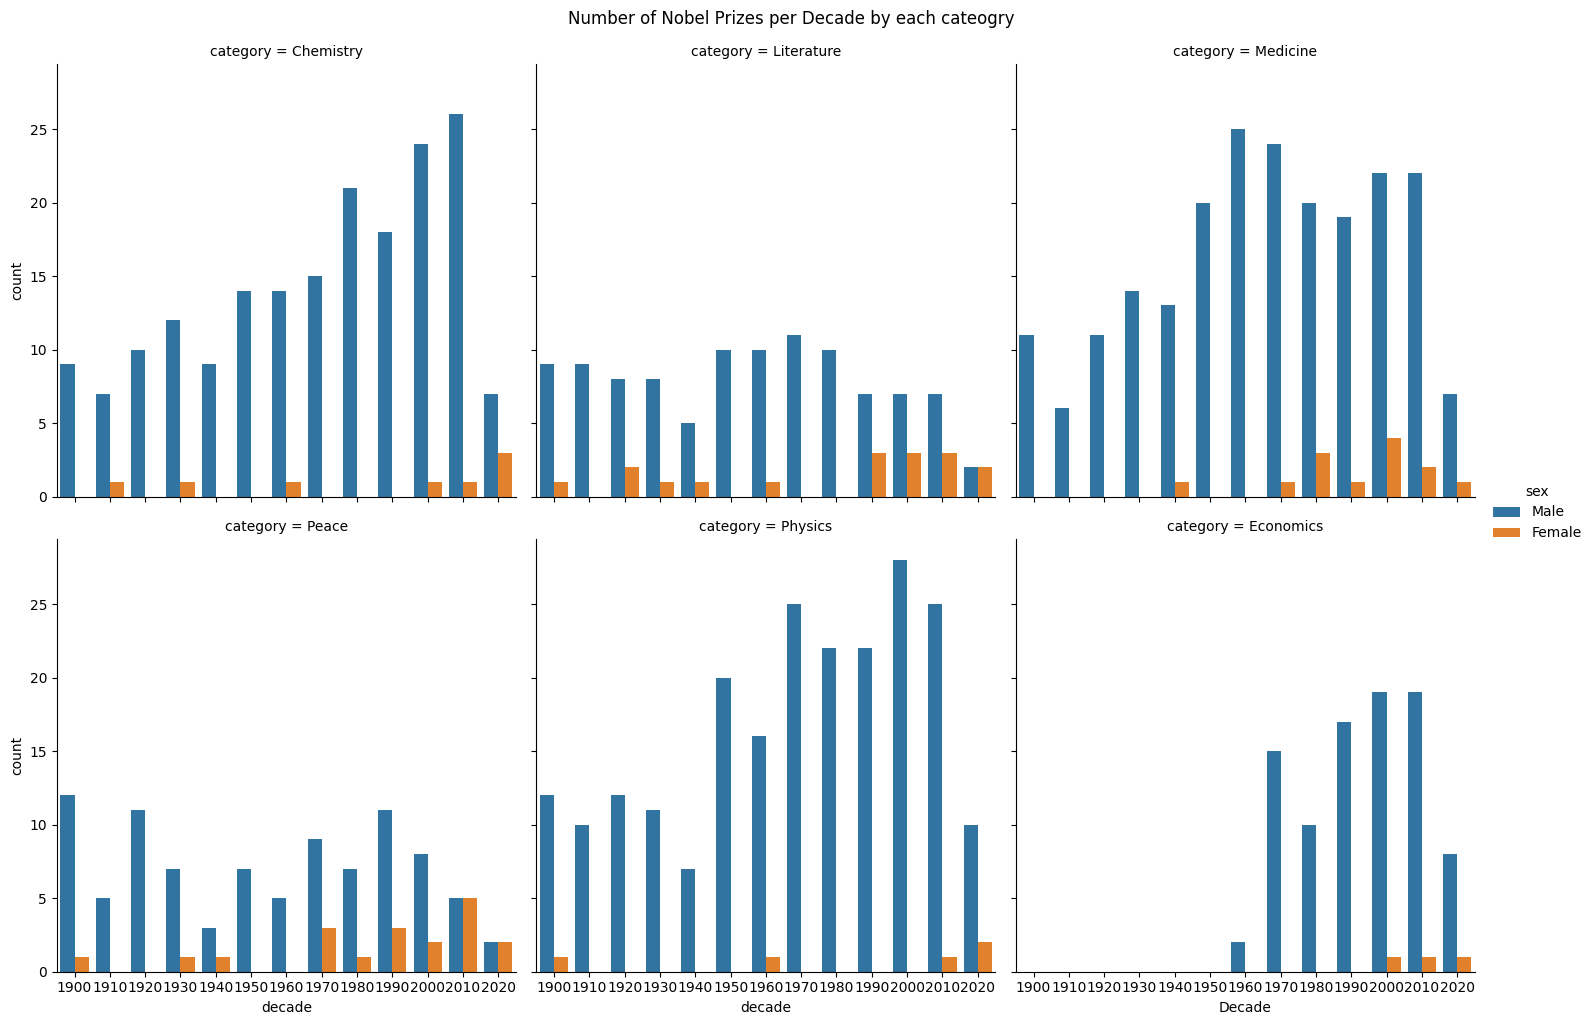

In [9]:
# Plotting number of nobel prize winners by decade and gender of winners
g = sns.catplot(x='decade', data=nobel, hue='sex', col='category', kind='count', col_wrap=3)
g.fig.suptitle('Number of Nobel Prizes per Decade by each cateogry', y=1.02)
plt.xlabel('Decade')
plt.ylabel('Count')

In [10]:
# Who was the first woman to receive a Nobel Prize, and in what category?
first_women = nobel.sort_values('year', ascending=True).loc[nobel.sex == 'Female', ['full_name', 'category']].iloc[0]
first_woman_name = first_women.full_name
first_woman_category = first_women.category

print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


In [11]:
# Which individuals or organizations have won multiple Nobel Prizes throughout the years?
repeat_list = nobel.full_name.value_counts()[lambda x: x > 1].index.tolist()
print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


Text(0, 0.5, 'Count')

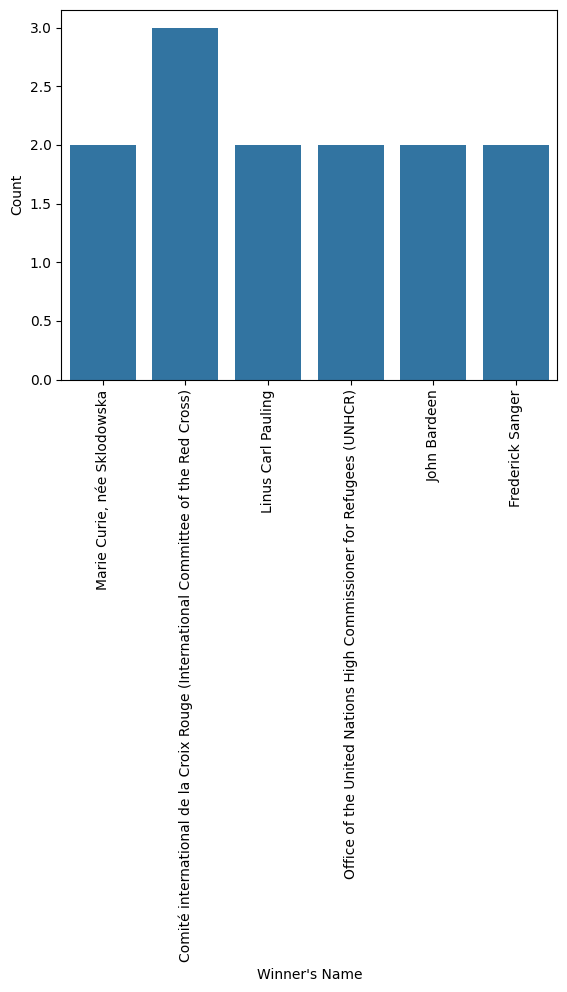

In [12]:
# plotting individuals and organizations who received multiple awards
multiple_winners = nobel.groupby('full_name').filter(lambda x: len(x) > 1)
sns.countplot(x='full_name', data=multiple_winners)
plt.xticks(rotation=90)
plt.xlabel("Winner's Name")
plt.ylabel("Count")